In [1]:
library(ggplot2)
library(ggpubr)
library(viridis)
library(gridExtra)
library(dplyr)
library(data.table)
library(magrittr)
library(ggpubr)
library(harmony)
library(umap)

Loading required package: viridisLite


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: Rcpp



In [2]:
## BandNorm progressive pooling
load("/Rdatas/ProgressivePoolingBandNorm.RData")

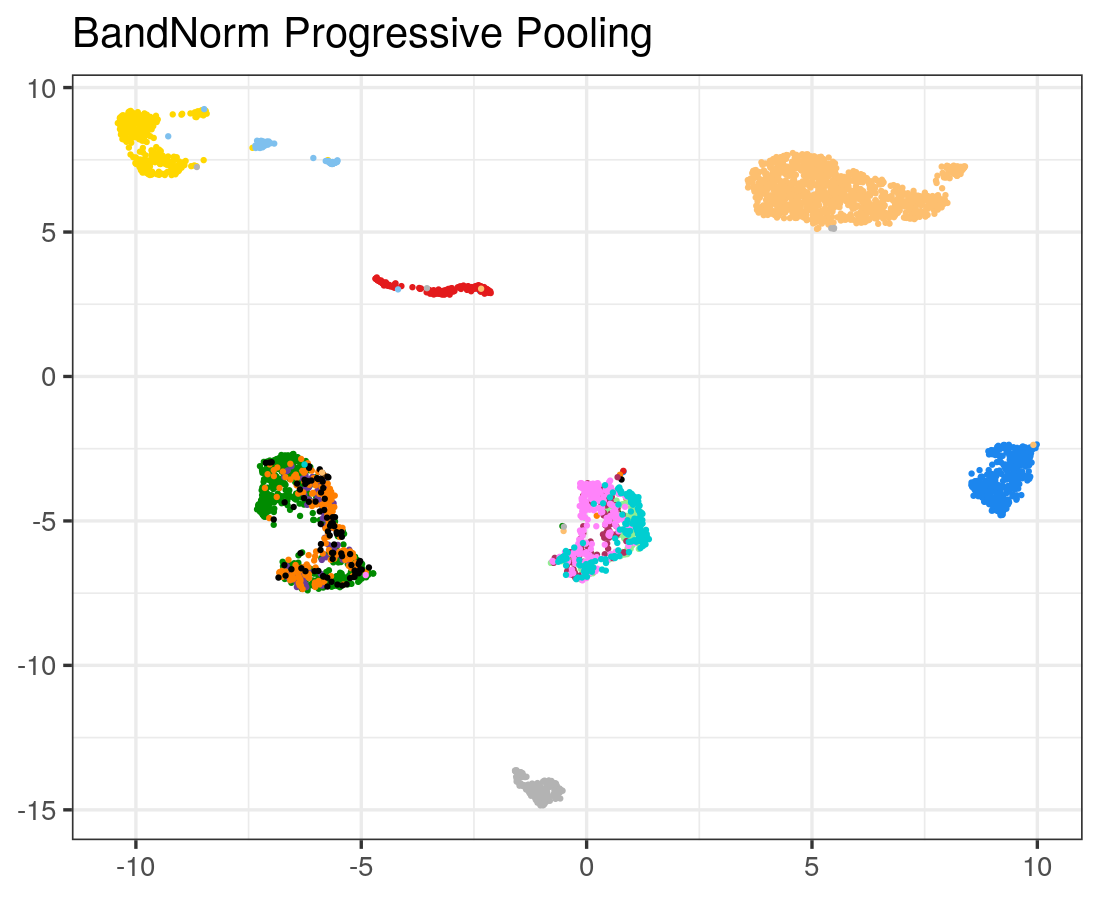

In [3]:

options(repr.plot.width = 11, repr.plot.height = 9, repr.plot.res = 100)
set.seed(20220222)
label = fread("/paper_prep/01072022/summaryFiles/Lee2019_summary.txt", header = T)

# embed_harmony = HarmonyMatrix(bandnormEMB1mb, label$batch, do_pca = FALSE)
res_umap = umap(bandnormEMB1mb)$layout %>% data.frame
# res_umap = umap(bandnormEMB1mb)$layout %>% data.frame

bandnorm_lee_pooling = data.frame(X1 = res_umap$X1, X2 = res_umap$X2, label = label$cell_type) %>% ggplot(aes(X1, X2, color = label)) +
geom_point() +
theme_bw(base_size = 25) +
scale_color_manual(breaks = c("Astro", "Endo", "L23", "L4", 'L5', 'L6', 'MG', 'MP', 'Ndnf', 'ODC', 'OPC', 'Pvalb', 'Sst', 'Vip'),
                  values = c("dodgerblue2", "#E31A1C", "green4", "#6A3D9A", "#FF7F00", "black", "gold1", "skyblue2", "palegreen2", "#FDBF6F", "gray70", "maroon", "orchid1", "darkturquoise")) +
theme(axis.title.x=element_blank(), axis.title.y=element_blank()) + ggpubr::rremove("legend")  +
ggtitle("BandNorm Progressive Pooling")
bandnorm_lee_pooling

# saveRDS(list(bandnorm_lee_pooling, bandnorm_lee_pooling2), file = "/RData/bandnorm_pooling_1mb_100kb.rds")

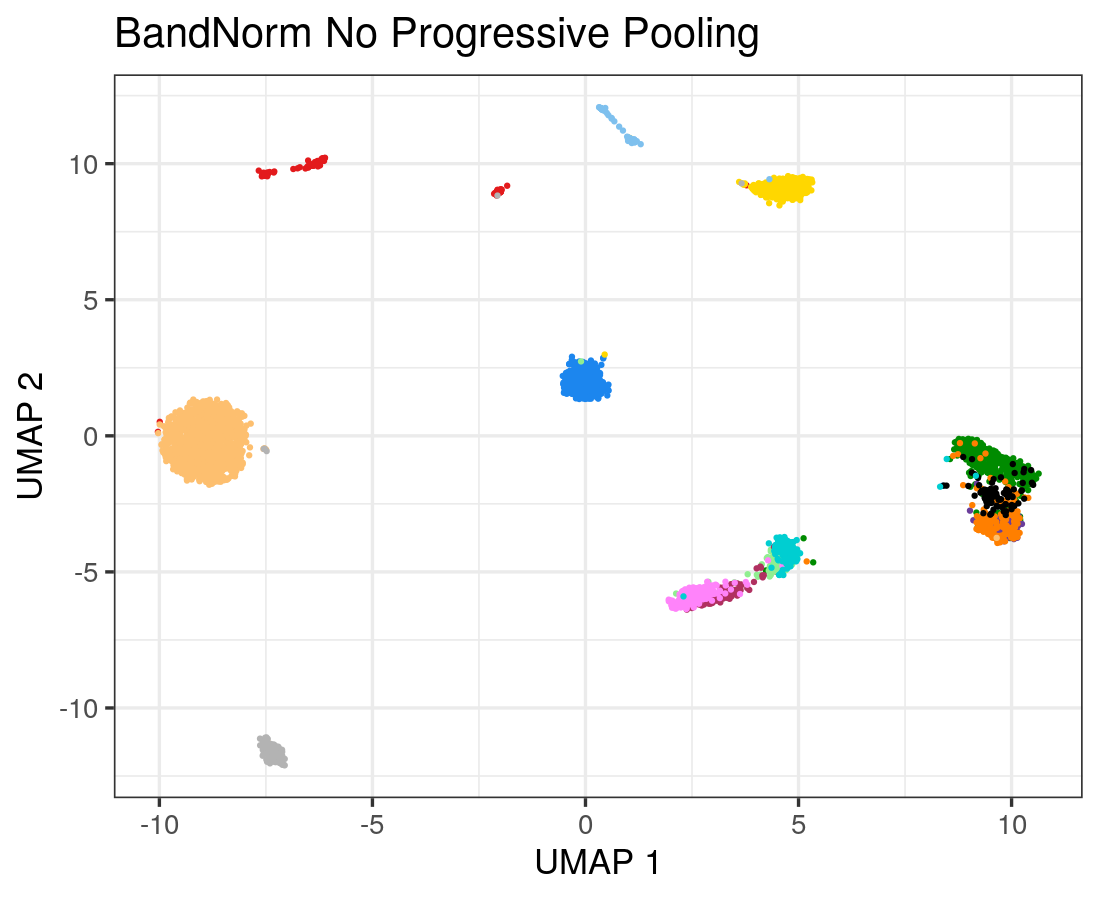

In [4]:
inPath = "/p/keles/schic/volumeA/Script/graph_rdata/"
methodList = c('CellScale','BandScale', 'BandNorm', 'scHiCluster', 'scHiC Topics', 'Higashi', 'BandScale+CNN', 'scVI-3D')

load(paste0(inPath, "ecker_bandnorm_harmony.Rdata"))
method = "BandNorm"
bandnorm_lee_nopool = p1 + ggtitle(method) + theme_bw(base_size = 25) + ggpubr::rremove("legend")  +
ggtitle("BandNorm No Progressive Pooling")
bandnorm_lee_nopool

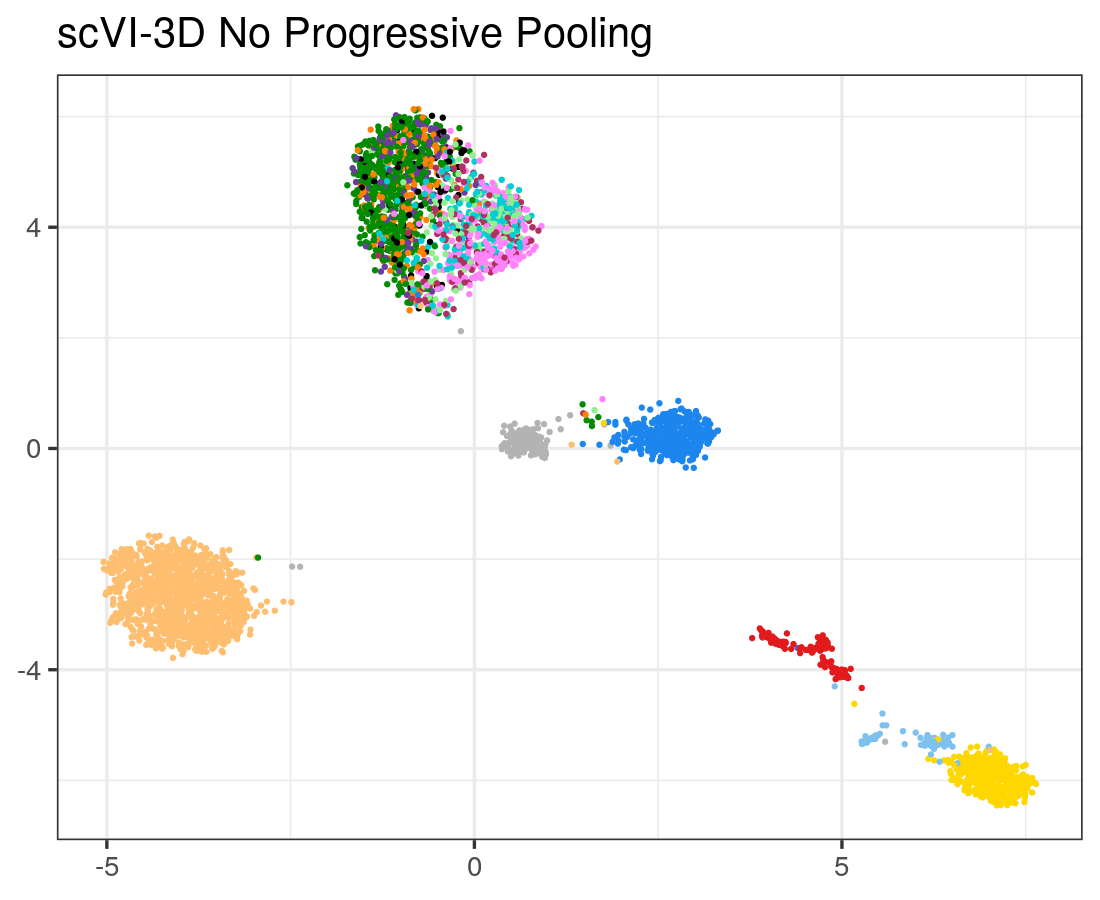

In [5]:
options(repr.plot.width = 11, repr.plot.height = 9, repr.plot.res = 100)

set.seed(1234)
embed = readRDS("/RData/mergeEmbed_1mb_pca.rds")
schic_label = read.table("/RData/Ecker2019_summary_3DVI_python_sort.txt", header = TRUE)
res_umap = umap(embed[, 1:150])$layout %>% data.frame

vi_lee_nopool = data.frame(X1 = res_umap$X1, X2 = res_umap$X2, label = schic_label$cell_type) %>% ggplot(aes(X1, X2, color = label)) +
geom_point() +
theme_bw(base_size = 25) +
scale_color_manual(breaks = c("Astro", "Endo", "L23", "L4", 'L5', 'L6', 'MG', 'MP', 'Ndnf', 'ODC', 'OPC', 'Pvalb', 'Sst', 'Vip'),
                  values = c("dodgerblue2", "#E31A1C", "green4", "#6A3D9A", "#FF7F00", "black", "gold1", "skyblue2", "palegreen2", "#FDBF6F", "gray70", "maroon", "orchid1", "darkturquoise")) +
theme(axis.title.x=element_blank(), axis.title.y=element_blank()) + ggpubr::rremove("legend")  +
ggtitle("scVI-3D No Progressive Pooling")
vi_lee_nopool


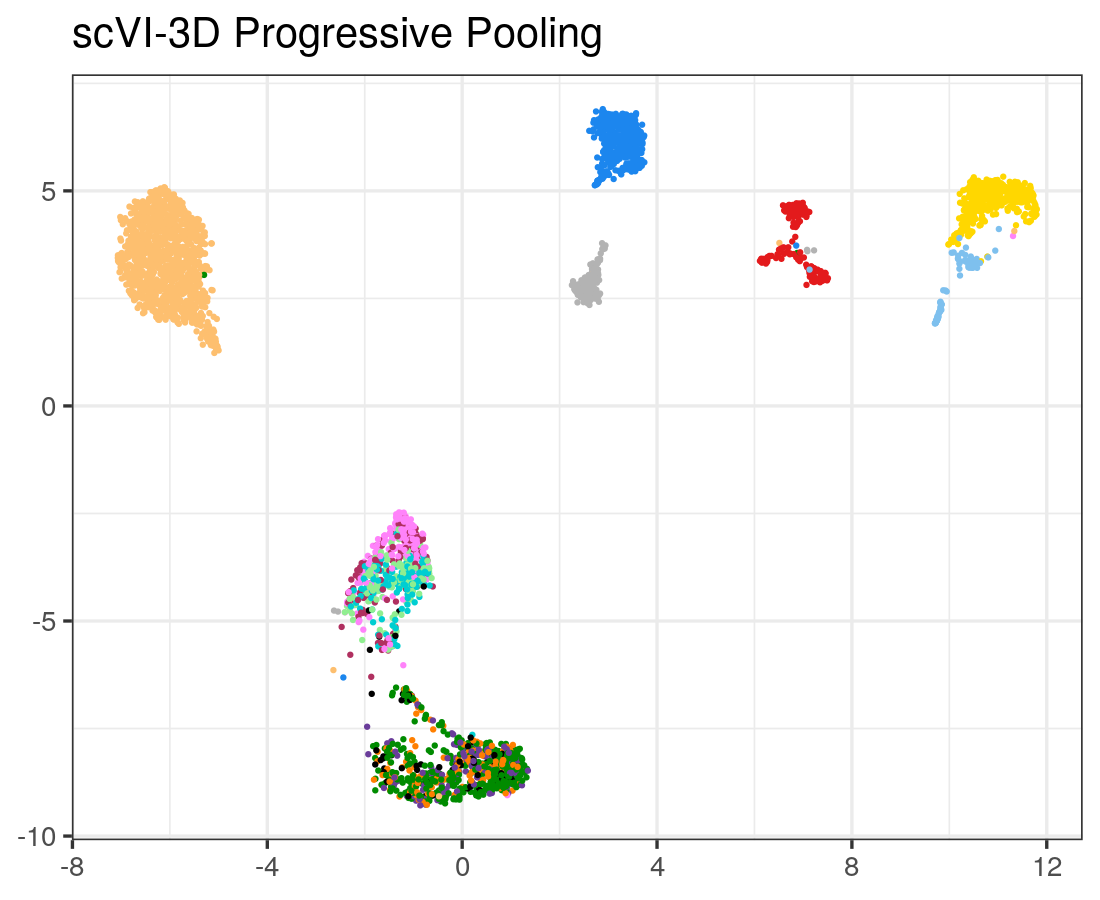

In [6]:
# ## scVI-3D
embed_3dvi = readRDS("/RData/Pool1_pca30_umap.rds")

vi_lee_pooling = data.frame(X1 = embed_3dvi$X1, X2 = embed_3dvi$X2, label = embed_3dvi$celltype, depth = embed_3dvi$depth, sparsity = embed_3dvi$sparsity) %>% filter(sparsity > 13000) %>% ggplot(aes(X1, X2, color = label)) +
geom_point() +
theme_bw(base_size = 25) +
scale_color_manual(breaks = c("Astro", "Endo", "L23", "L4", 'L5', 'L6', 'MG', 'MP', 'Ndnf', 'ODC', 'OPC', 'Pvalb', 'Sst', 'Vip'),
                  values = c("dodgerblue2", "#E31A1C", "green4", "#6A3D9A", "#FF7F00", "black", "gold1", "skyblue2", "palegreen2", "#FDBF6F", "gray70", "maroon", "orchid1", "darkturquoise")) +
 theme(axis.title.x=element_blank(), axis.title.y=element_blank()) + ggpubr::rremove("legend") + ggtitle("scVI-3D Progressive Pooling")
vi_lee_pooling



png 
  2

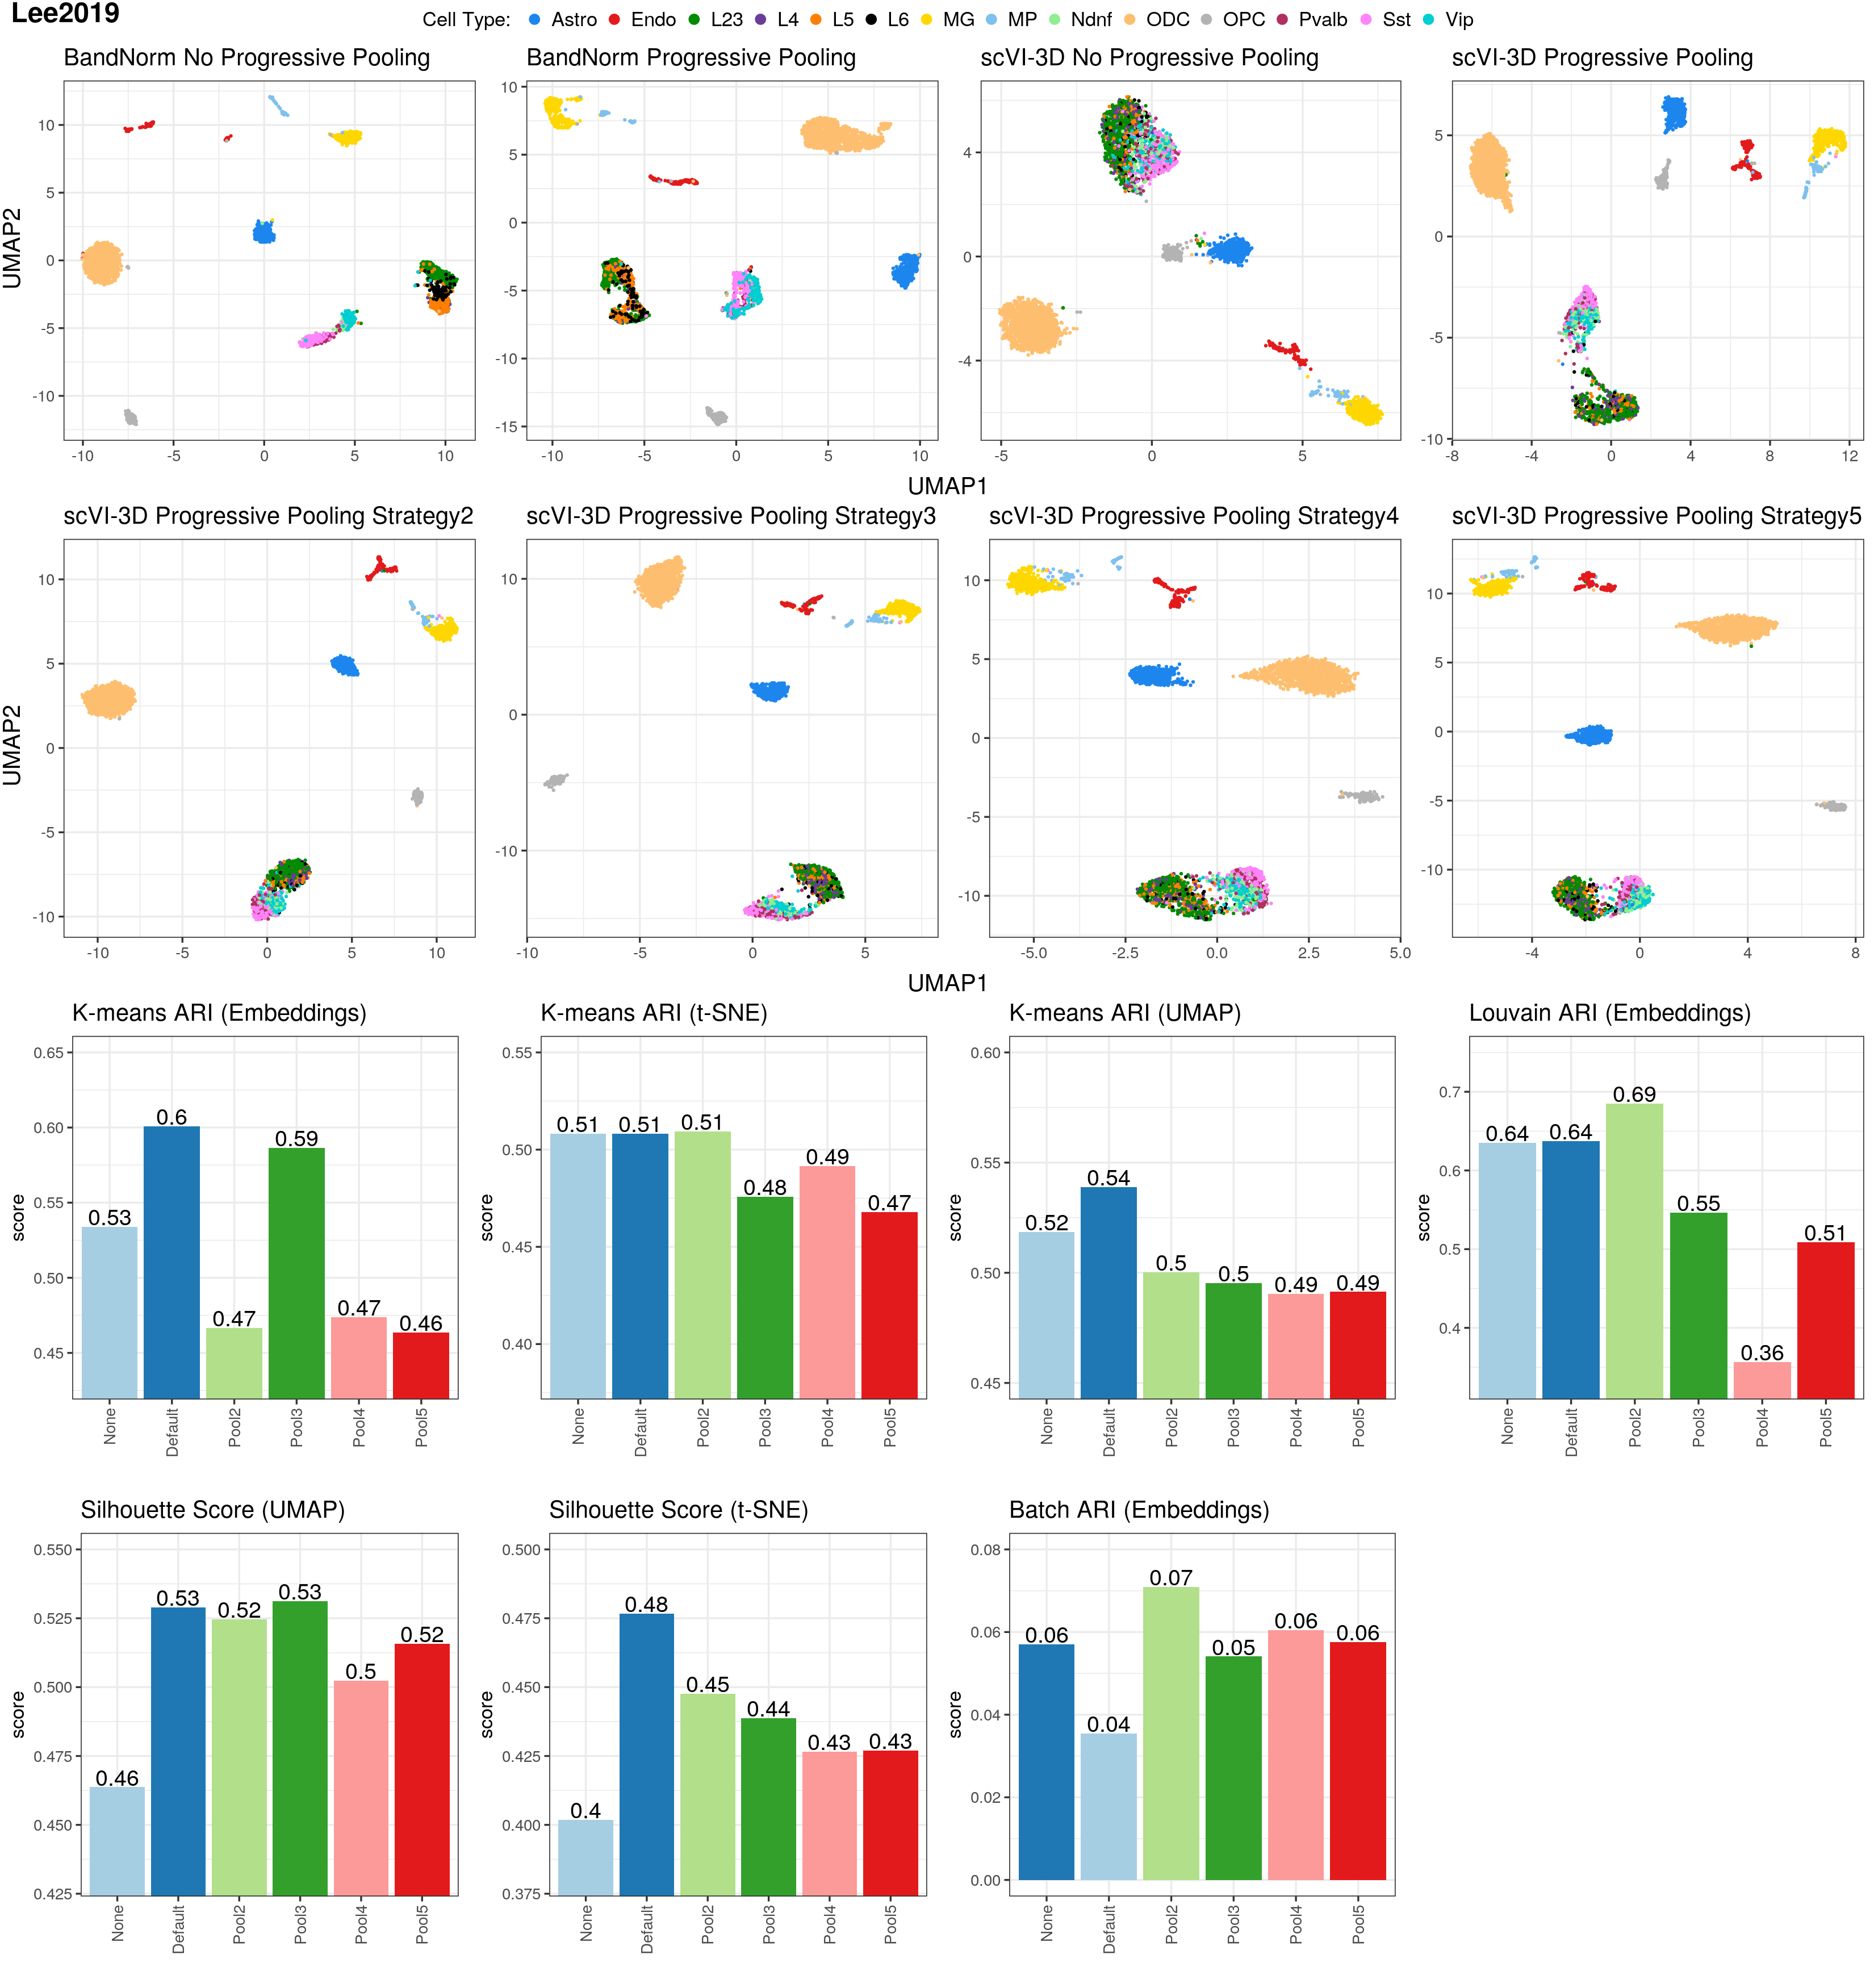

In [25]:
options(repr.plot.width = 33, repr.plot.height = 35, repr.plot.res = 100)

ind = 1
figPooling = ggarrange(bandnorm_lee_nopool + theme(legend.text = element_text(size = 25), axis.title.x=element_blank(), axis.title.y=element_blank()) + guides(colour = guide_legend(title = "Cell Type: ", nrow = 1, override.aes = list(size = 6))), 
                 bandnorm_lee_pooling +theme(legend.text = element_text(size = 25), axis.title.x=element_blank(), axis.title.y=element_blank()) ,
                 vi_lee_nopool + theme(legend.text = element_text(size = 25), axis.title.x=element_blank(), axis.title.y=element_blank()) ,
                 vi_lee_pooling + theme(legend.text = element_text(size = 25), axis.title.x=element_blank(), axis.title.y=element_blank()) ,
                 ncol = 4, nrow = 1, common.legend = TRUE, legend = "top") 


figPooling = annotate_figure(figPooling,
                bottom = text_grob("UMAP1", size = 30),
                left = text_grob("UMAP2", rot = 90, size = 30),
                fig.lab = "Lee2019", fig.lab.face = "bold", fig.lab.size = 35)

pool_other_tmp = ggarrange(pp_fig$Pool2, pp_fig$Pool3, pp_fig$Pool4, pp_fig$Pool5, ncol = 4, nrow = 1)
pool_other = annotate_figure(pool_other_tmp,
                bottom = text_grob("UMAP1", size = 30),
                left = text_grob("UMAP2", rot = 90, size = 30),
                fig.lab = "", fig.lab.face = "bold", fig.lab.size = 35)

metric_fig = ggarrange(metrics_bar[[4]], metrics_bar[[5]], metrics_bar[[6]], metrics_bar[[1]], metrics_bar[[3]], metrics_bar[[2]], metrics_bar[[7]], nrow = 2, ncol = 4)

ggarrange(figPooling, pool_other, metric_fig, ncol = 1, nrow = 3, heights = c(1, 1, 2))

pdf("Lee2019_progressivePooling.pdf", width = 33, height =35)
ggarrange(figPooling, pool_other, metric_fig, ncol = 1, nrow = 3, heights = c(1, 1, 2))
dev.off()